In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Inspect actions (portfolio weights)
Note: Backtest must be completed before insection of its actions can be done.

In [2]:
def make_int(x):
    if x.is_integer():
        x = int(x)
    return x

In [3]:
def get_actions(market_name, model_base_name, gamma_trade, gamma_risk, seed=0):
    return pd.read_csv(f'../experiments/{market_name}/seeded/{model_base_name}/seed_{seed}/trade_{gamma_trade}_risk_{gamma_risk}/actions.csv', index_col=0, parse_dates=True)

In [4]:
# papermill parameters
# specify which backtest to inspect
MARKET_NAME = 'TEST_5' # use either | 'DOW_30' | 'LA_40' | 'NIK_25' |
MODEL_BASE_NAME = 'RL_CNN' # use either | 'RL_CNN' | 'RL_str_fcast' | 'RL_all_inp' |
N = 15 # how many plots to make
SEED = 0 # don't change - backtests were only done for seed=0

In [5]:
# create directory to save action plots if it doesn't exist already
if not os.path.exists(f'../experiments/actions_check/{MARKET_NAME}/{MODEL_BASE_NAME}'):
    os.makedirs(f'../experiments/actions_check/{MARKET_NAME}/{MODEL_BASE_NAME}')

In [6]:
# see the possible gamma values to select from (these were all on the frontier for the given seed)
frontier_df = pd.read_csv(f'../experiments/{MARKET_NAME}/seeded/{MODEL_BASE_NAME}/backtests/{MARKET_NAME}_{MODEL_BASE_NAME}_seed_frontiers.csv')
frontier_df = frontier_df[frontier_df['seed']==SEED]
frontier_df = frontier_df.sort_values(by=['excess_risk', 'sharpe'], ascending=True)
frontier_df.head()

,gamma_trade,gamma_risk,seed,excess_return,excess_risk,sharpe,is_pareto
0,100.0,562.0,0,-0.356076,2.273448,-0.156624,True
1,60.0,562.0,0,-0.313483,2.287761,-0.137026,True
2,60.0,1000.0,0,-0.294062,2.291084,-0.128351,True
3,10.0,1000.0,0,-0.247965,2.302665,-0.107686,True
4,1.0,1000.0,0,-0.237764,2.305224,-0.103141,True


In [7]:
gamma_trade_list = [make_int(i) for i in list(frontier_df['gamma_trade'].round(3))]
gamma_risk_list = [make_int(j) for j in list(frontier_df['gamma_risk'].round(3))]

GAMMA_PAIRS = list(zip(gamma_trade_list, gamma_risk_list))
#GAMMA_PAIRS

In [8]:
# get N risk brackets
risk_min = frontier_df['excess_risk'].min()
risk_max = frontier_df['excess_risk'].max()
risk_range = risk_max - risk_min
risk_jump = risk_range/N

print(f'min={risk_min} - max={risk_max}')
print(f'jump={risk_jump}')

risk_brackets = [( risk_min+(i*risk_jump) , risk_min+((i+1)*risk_jump) ) for i in range(N)]

min=2.2734481020539263 - max=27.003241855324895
jump=1.6486529168847313


[1/15]	bracket=(2.27, 3.92)
[2/15]	bracket=(3.92, 5.57)
[3/15]	bracket=(5.57, 7.22)
	no result for [4/15]
	no result for [5/15]
	no result for [6/15]
[7/15]	bracket=(12.17, 13.81)
	no result for [8/15]
	no result for [9/15]
	no result for [10/15]
	no result for [11/15]
	no result for [12/15]
[13/15]	bracket=(22.06, 23.71)
[14/15]	bracket=(23.71, 25.35)
[15/15]	bracket=(25.35, 27.0)


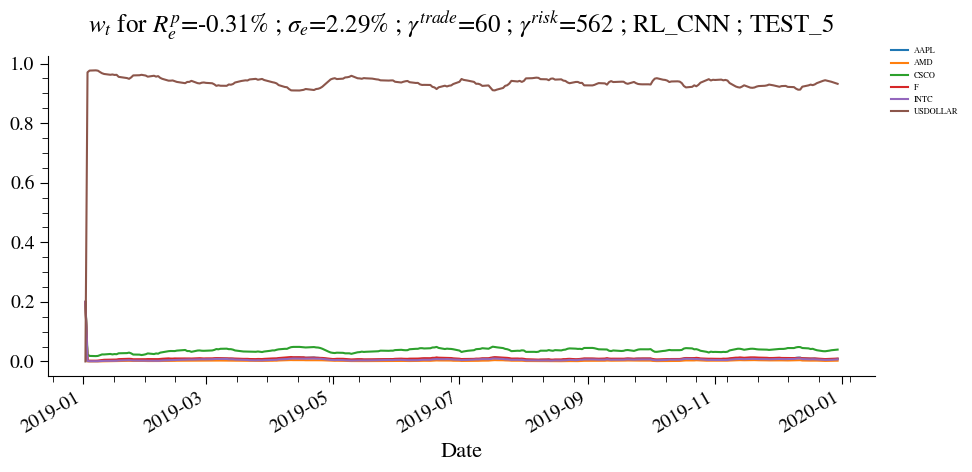

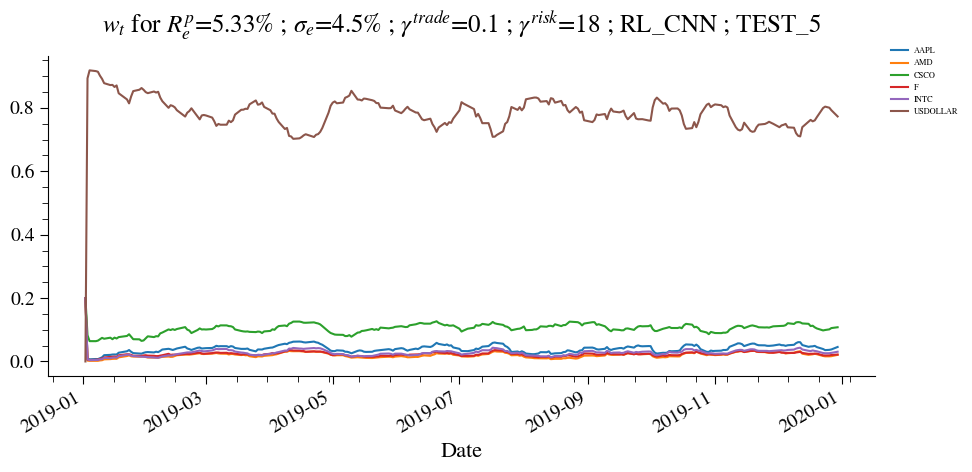

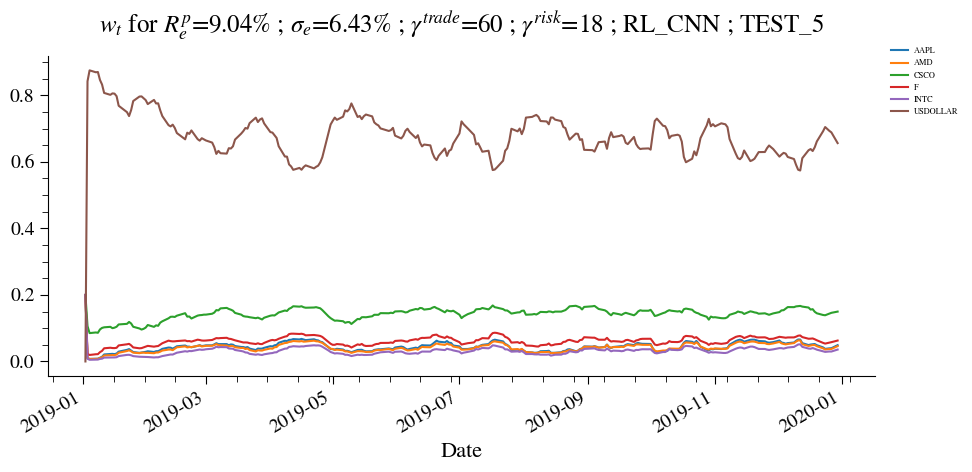

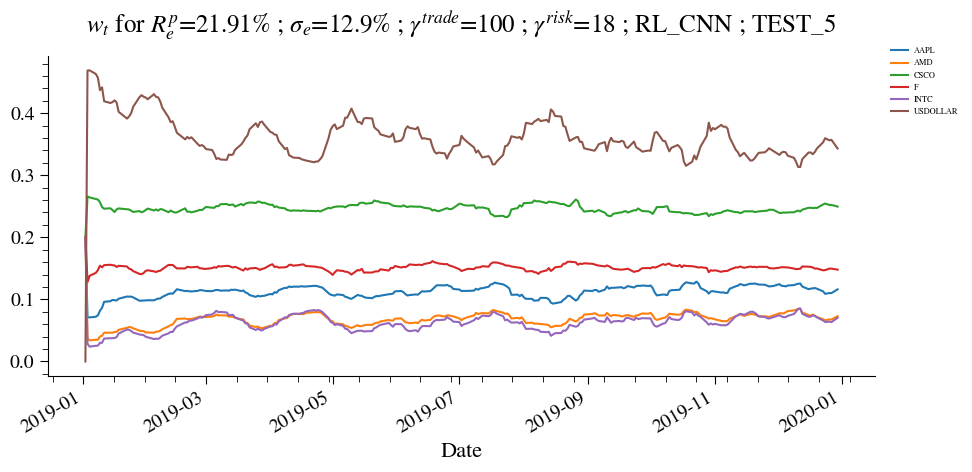

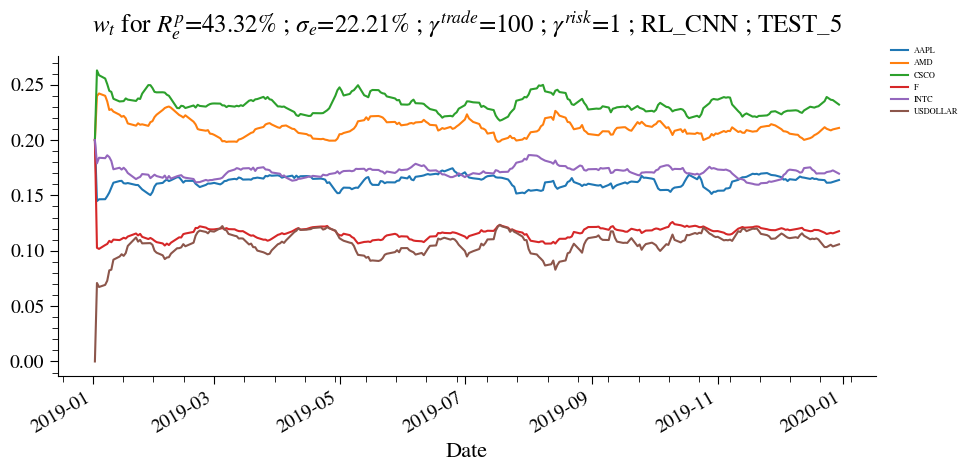

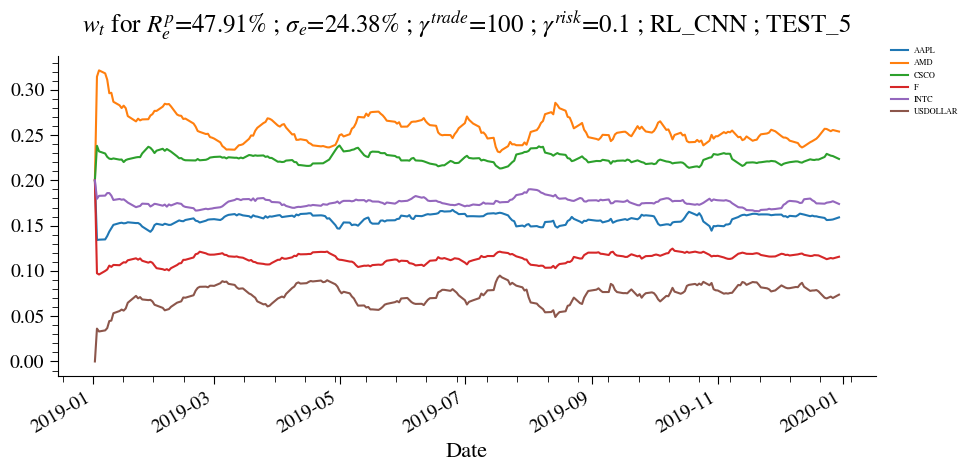

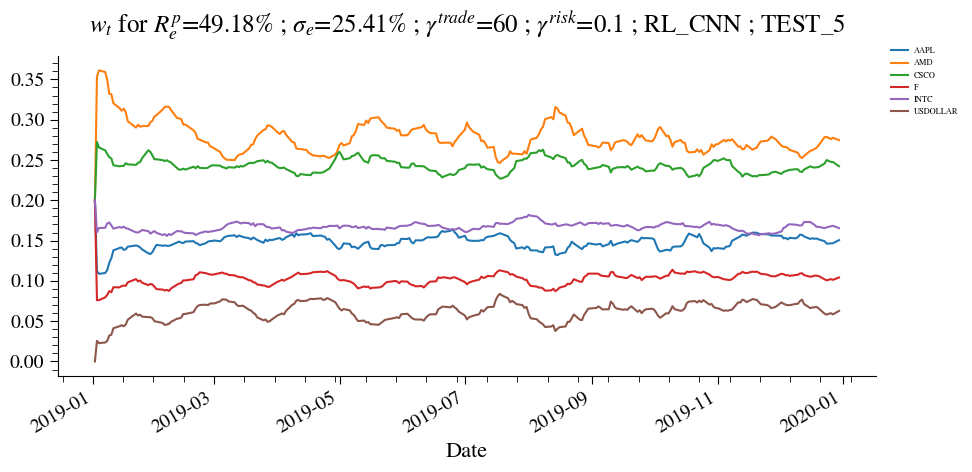

In [9]:
for n in range(N):
    try:
        #idx = (len(frontier_df)//N) * n 
        #GAMMA_TRADE, GAMMA_RISK = GAMMA_PAIRS[idx]
        #print(f'[{m+1}/{N}]\tidx={idx}\tgammas=({GAMMA_TRADE}, {GAMMA_RISK})')
        
        bracket = risk_brackets[n]
        result = frontier_df[(frontier_df['excess_risk']>bracket[0]) & \
                             (frontier_df['excess_risk']<bracket[1])].head(1)
        ret = result['excess_return'].values[0]
        risk = result['excess_risk'].values[0]
        
        GAMMA_TRADE = make_int(result['gamma_trade'].values[0])
        GAMMA_RISK = make_int(result['gamma_risk'].values[0])

        rl_actions = get_actions(market_name=MARKET_NAME, 
                                 model_base_name=MODEL_BASE_NAME, 
                                 gamma_trade=GAMMA_TRADE, 
                                 gamma_risk=GAMMA_RISK, 
                                 seed=SEED)

        print(f'[{n+1}/{N}]\tbracket=({round(bracket[0],2)}, {round(bracket[1],2)})')

        #result = frontier_df[(frontier_df['gamma_trade']==GAMMA_TRADE) & \
        #                  (frontier_df['gamma_risk']==GAMMA_RISK) & \
        #                  (frontier_df['seed']==SEED)]
        

        plot_title = '$w_t$ for $R^p_e$='+f'{round(ret,2)}% ; '+ \
                    '$\sigma_e$='+f'{round(risk,2)}% ; '+\
                    '$\gamma^{trade}$='+f'{GAMMA_TRADE} ; '+\
                    '$\gamma^{risk}$='+f'{GAMMA_RISK} ; '+\
                    f'{MODEL_BASE_NAME} ; {MARKET_NAME}'

        rl_actions.plot(legend=False, figsize=(10,5), title=plot_title)
        plt.legend(bbox_to_anchor=(1.11, 1.05), prop={'size': 6})
        plt.savefig(f'../experiments/actions_check/{MARKET_NAME}/{MODEL_BASE_NAME}/{n}.png') #_risk_{GAMMA_RISK}_trade_{GAMMA_TRADE}.png')
        
    except Exception as e:
        print(f'\tno result for [{n+1}/{N}]')#, e)

In [10]:
rl_actions

,AAPL,AMD,CSCO,F,INTC,USDOLLAR
Date,,,,,,
2019-01-02,0.200000,0.200000,0.200000,0.200000,0.200000,0.000000
2019-01-03,0.112148,0.353530,0.272406,0.075936,0.160409,0.025570
2019-01-04,0.108794,0.361264,0.265500,0.076110,0.165616,0.022717
2019-01-07,0.109750,0.359224,0.262048,0.079536,0.165896,0.023545
2019-01-08,0.113374,0.349810,0.257450,0.082658,0.171262,0.025446
...,...,...,...,...,...,...
2019-12-23,0.149211,0.278442,0.245684,0.102048,0.165434,0.059181
2019-12-24,0.146211,0.278648,0.249942,0.100624,0.166431,0.058143
2019-12-26,0.146449,0.275886,0.247639,0.102233,0.167830,0.059963


In [11]:
print('done.')

done.
